In [14]:
import os
os.getcwd()
# os.chdir("../")

'C:\\Users\\arunk\\Hackathon\\FinancialFraudDetection'

In [12]:
import os

from src.frauddetection.entity.config_entity import DataIngestionConfig
from src.exception import FraudException
from src.logger import logging

import sys, os
from datetime import date
import pandas as pd
import shutil
from src.frauddetection.entity.artifact_entity import DataIngestionArtifact
from datetime import datetime

In [ ]:
os.system('cmd /c "kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset"')

In [ ]:
from src.frauddetection.components.data_ingestion import DataIngestion


dataingest = DataIngestion(DataIngestionConfig)
dataingest.download_payment_data()
    

In [16]:
import os
os.chdir(r"C:\Users\arunk\Hackathon\FinancialFraudDetection")
import pandas as pd
df = pd.read_csv(r"FraudDetection\artifact\data_ingestion\2023-03-20-22-20-49\raw_data\PS_20174392719_1491204439457_log.csv")

In [49]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [25]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [17]:
df.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0        0                 1
306   CASH_OUT  220427.13   C1029846599  0.00           0.00            C129321077   882543.64       1102970.77      0        0                 1
                221047.89   C644407995   13756.00       0.00            C1396283314  9082.00         0.00            0        0                 1
                221009.03   C74685400    102768.00      0.00            C1714223283  767644.73       988653.76       0        0                 1
                220986.46   C540058568   9141.00        0.00            C1344091292  0.00            220986.46       0        0                 1
                                                                                                                                 

In [18]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values
import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()


In [20]:
# Checking correlation
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

C:\Users\arunk\AppData\Local\Temp\ipykernel_9764\1518218194.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [22]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [39]:
column_list = df.columns.tolist()

In [24]:
df_numeric = df.select_dtypes(exclude="O")
df_numeric.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt

df.plot.box()

<Axes: >

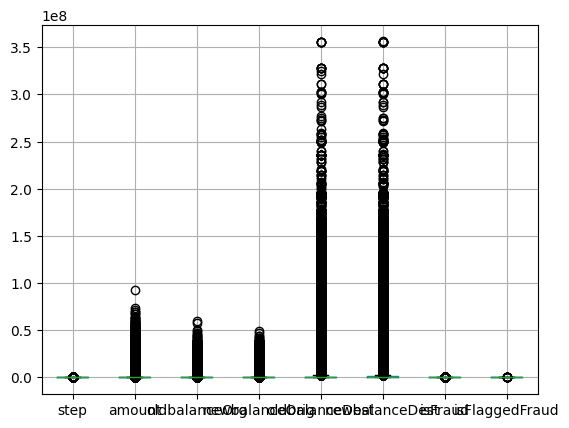

In [41]:
numeric_col = df.select_dtypes(exclude="O").columns.tolist()
df_numeric = df.select_dtypes(exclude="O")
# for i in numeric_col:
#     df[i].plot(kind='box', title='online payments')

df_numeric.boxplot(return_type='axes')

In [9]:
no_of_columns=len(df.columns.tolist())
# row_plt=int(no_of_columns/2)
plt.figure(figsize=(20,15))
fig, axes = plt.subplots(3,3) # create figure and axes
for i,el in enumerate(list(df_numeric.columns.values)[:-1]):
    a = df.boxplot(el, by="type", ax=axes.flatten()[i])

fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout() 

plt.show()

NameError: name 'df' is not defined

In [7]:
os.system('cmd /c "kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset" -f {}')

1

In [8]:
os.getcwd()

'c:\\Users\\arunk\\Hackathon\\FinancialFraudDetection'

In [26]:
df.dtypes
from frauddetection.utils.utils import read_yaml_file
from frauddetection.entity.artifact_entity import DataValidationArtifact
from frauddetection.entity.config_entity    import DataValidationConfig


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [47]:
from frauddetection.utils.utils import read_yaml_file

d = read_yaml_file(r"config\schema.yaml")
list(d['columns'].keys())

['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']

In [38]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [41]:
df.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']